## Taiwan Semiconductor Manufacturing Company TSM GC AAPL

## 1. Stationarity

- Before applying Granger Causality test, it is necessary to test for stationary. \
- Augmented Dickey-Fuller or Phillips-Perron are tests for stationary. \
- Null hypothesis: time series has at least one unit root (i.e. non-stationary).
- Alternative hypothesis: time series does not have unit roots. d. 

## 2. GC for non-stationary series (Toda & Yamamoto 1995)
- Check to see wheter the two series are cointegrate.
- Apply GC for both directions

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() 

## AAPL data from 2021 to 2023
data_aapl_2023 = pdr.get_data_yahoo("AAPL", start="2023-01-01", end="2023-12-31")
data_aapl_2022 = pdr.get_data_yahoo("AAPL", start="2022-01-01", end="2022-12-31")
data_aapl_2021 = pdr.get_data_yahoo("AAPL", start="2021-01-01", end="2021-12-31")

## TSMC data from 2021 to 2023
## AAPL data from 2021 to 2023
data_tsm_2023 = pdr.get_data_yahoo("TSM", start="2023-01-01", end="2023-12-31")
data_tsm_2022 = pdr.get_data_yahoo("TSM", start="2022-01-01", end="2022-12-31")
data_tsm_2021 = pdr.get_data_yahoo("TSM", start="2021-01-01", end="2021-12-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Compute Adj Close Diff and Daily Return for AAPL

In [3]:
data_aapl_2023['Adj Close Diff'] = data_aapl_2023['Adj Close'].diff()
data_aapl_2023['Adj Close Prev'] = data_aapl_2023['Adj Close'].shift(periods=1)
data_aapl_2023['Daily Return'] = (data_aapl_2023['Adj Close'] - data_aapl_2023['Adj Close Prev'])/data_aapl_2023['Adj Close Prev']

data_aapl_2022['Adj Close Diff'] = data_aapl_2022['Adj Close'].diff()
data_aapl_2022['Adj Close Prev'] = data_aapl_2022['Adj Close'].shift(periods=1)
data_aapl_2022['Daily Return'] = (data_aapl_2022['Adj Close'] - data_aapl_2022['Adj Close Prev'])/data_aapl_2022['Adj Close Prev']

data_aapl_2021['Adj Close Diff'] = data_aapl_2021['Adj Close'].diff()
data_aapl_2021['Adj Close Prev'] = data_aapl_2021['Adj Close'].shift(periods=1)
data_aapl_2021['Daily Return'] = (data_aapl_2021['Adj Close'] - data_aapl_2021['Adj Close Prev'])/data_aapl_2021['Adj Close Prev']

In [4]:
## Compute Adj Close Diff and Daily Return for TSM
data_tsm_2023['Adj Close Diff'] = data_tsm_2023['Adj Close'].diff()
data_tsm_2023['Adj Close Prev'] = data_tsm_2023['Adj Close'].shift(periods=1)
data_tsm_2023['Daily Return'] = (data_tsm_2023['Adj Close'] - data_tsm_2023['Adj Close Prev'])/data_tsm_2023['Adj Close Prev']

data_tsm_2022['Adj Close Diff'] = data_tsm_2022['Adj Close'].diff()
data_tsm_2022['Adj Close Prev'] = data_tsm_2022['Adj Close'].shift(periods=1)
data_tsm_2022['Daily Return'] = (data_tsm_2022['Adj Close'] - data_tsm_2022['Adj Close Prev'])/data_tsm_2022['Adj Close Prev']

data_tsm_2021['Adj Close Diff'] = data_tsm_2021['Adj Close'].diff()
data_tsm_2021['Adj Close Prev'] = data_tsm_2021['Adj Close'].shift(periods=1)
data_tsm_2021['Daily Return'] = (data_tsm_2021['Adj Close'] - data_tsm_2021['Adj Close Prev'])/data_tsm_2021['Adj Close Prev']

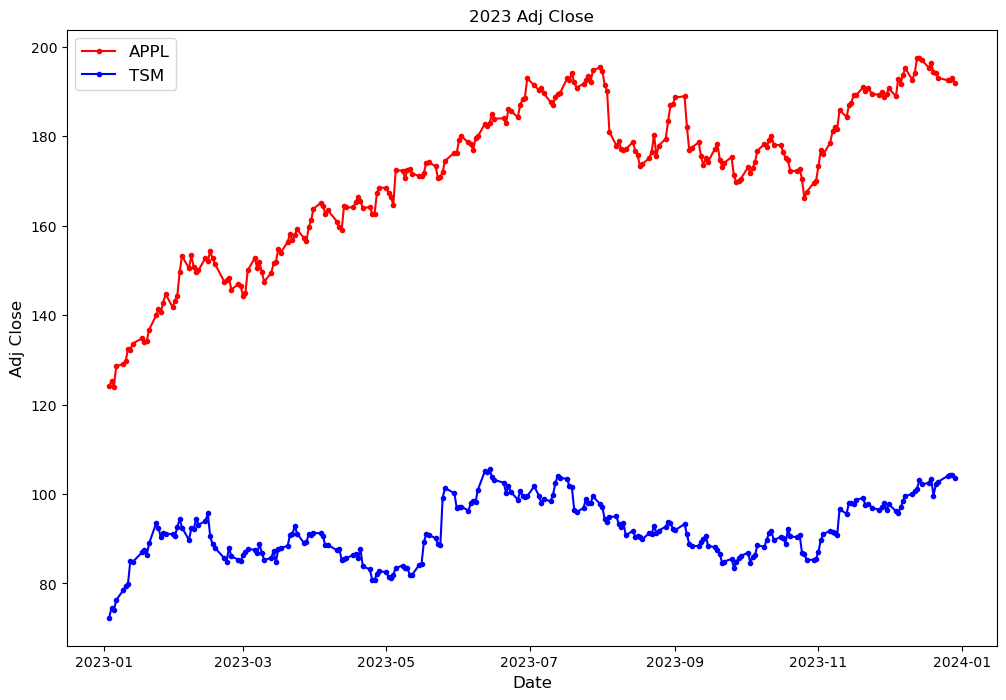

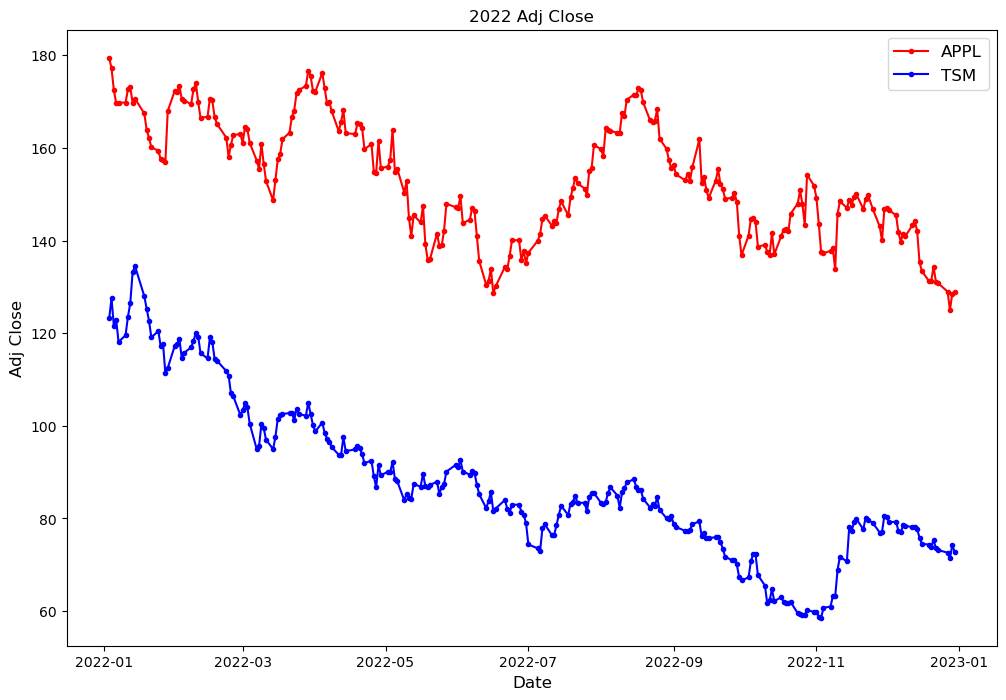

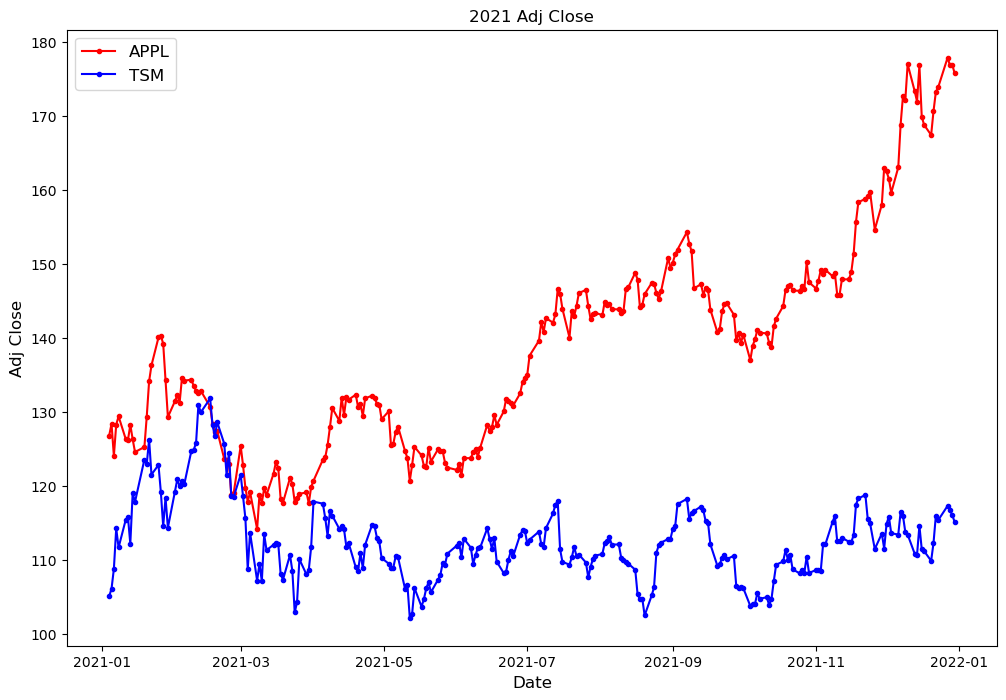

In [5]:
# Plot APPL and TSM
# Plot Adj Close
# Plot the main line with markers

# 2023
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2023['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2023['Adj Close'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2023 Adj Close')

plt.legend(fontsize=12)
plt.show()

# 2022
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2022['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2022['Adj Close'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2022 Adj Close')

plt.legend(fontsize=12)
plt.show()

#2021
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2021['Adj Close'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2021['Adj Close'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('2021 Adj Close')

plt.legend(fontsize=12)
plt.show()

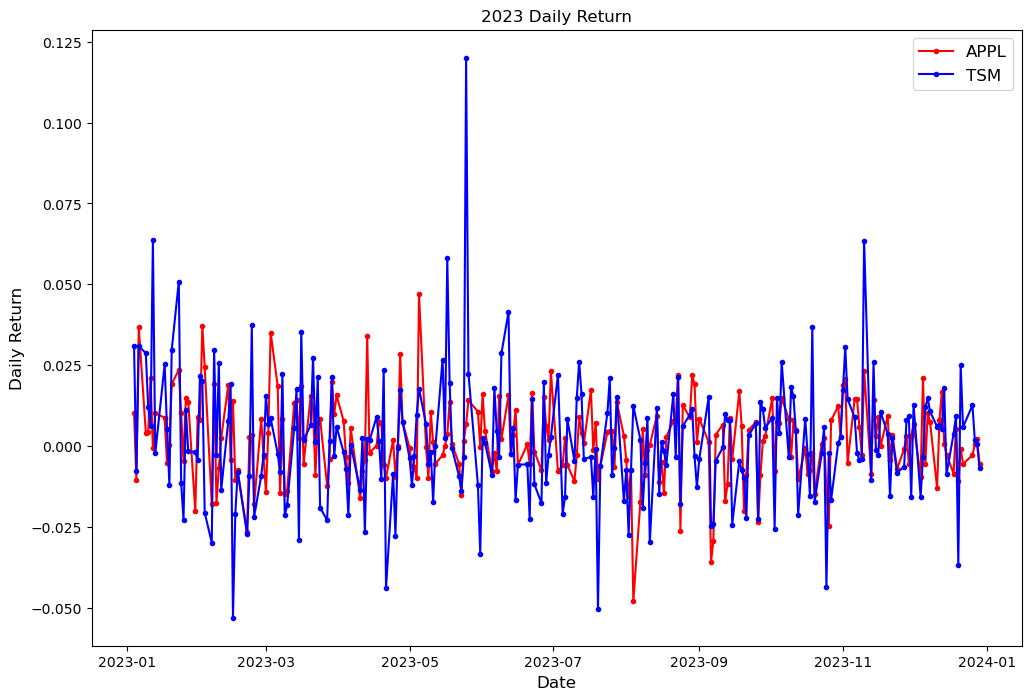

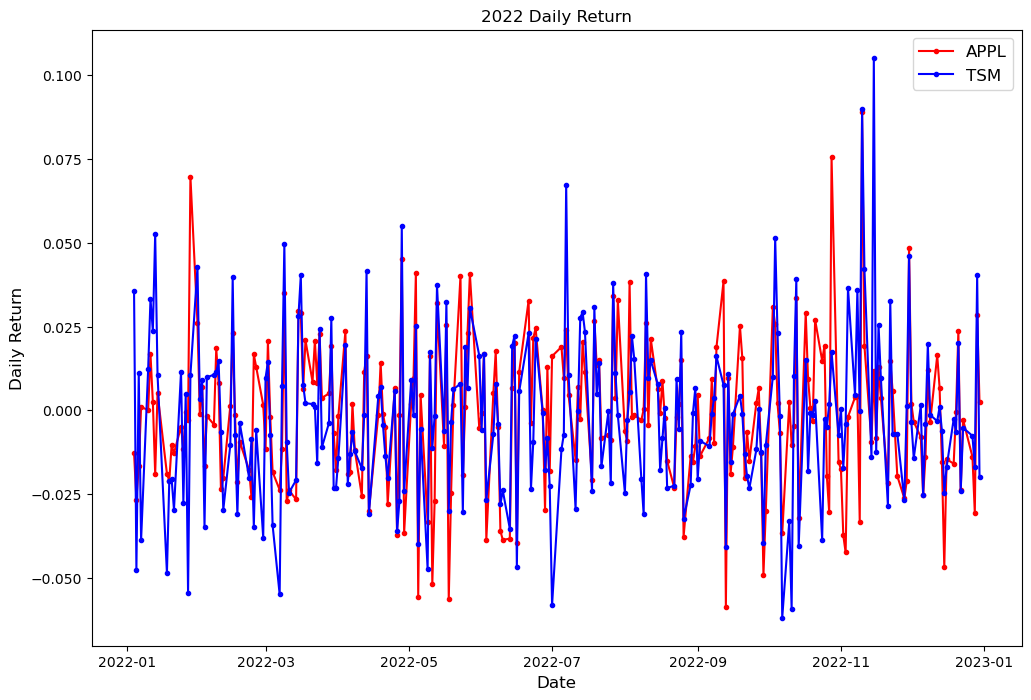

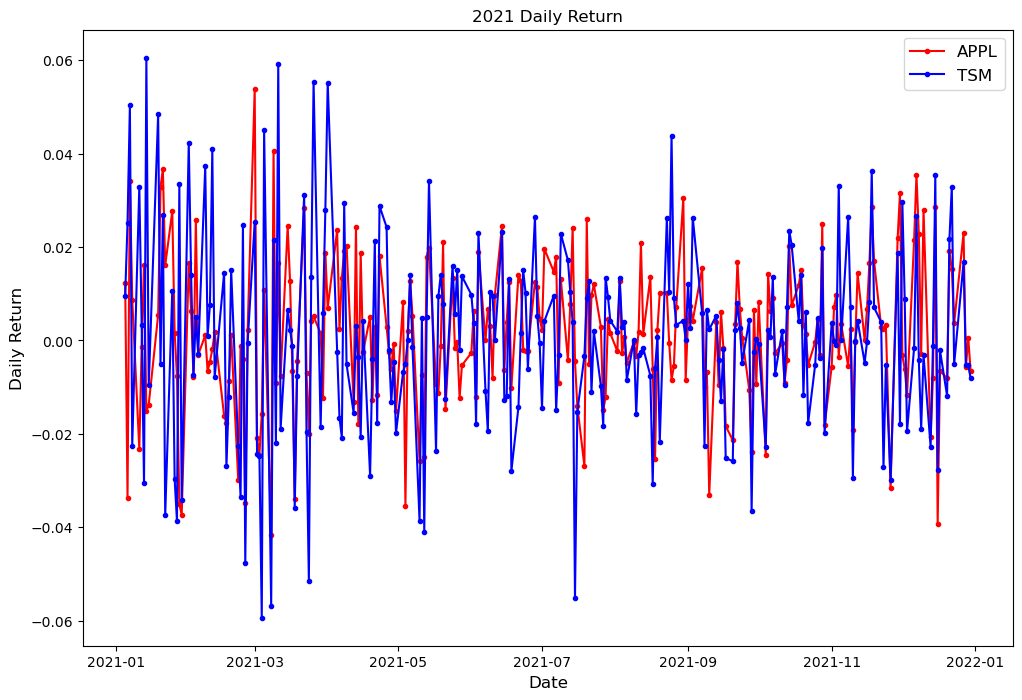

In [6]:
# Plot APPL and TSM
# Plot Adj Close
# Plot the main line with markers

# 2023
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2023['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2023['Daily Return'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2023 Daily Return')

plt.legend(fontsize=12)
plt.show()

# 2022
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2022['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2022['Daily Return'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2022 Daily Return')

plt.legend(fontsize=12)
plt.show()

#2021
plt.figure(figsize=(12,8))
plt.plot(data_aapl_2021['Daily Return'],'.-',color='red',label='APPL')
plt.plot(data_tsm_2021['Daily Return'],'.-',color='blue',label='TSM')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.title('2021 Daily Return')

plt.legend(fontsize=12)
plt.show()

In [7]:
test_mismatch_date = (data_tsm_2023.index == data_aapl_2023.index)

In [8]:
np.unique(test_mismatch_date)

array([ True])

## GC for 2023

First, test for stationary

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'][1:].values)
adf_aapl_2023 = adfuller(data_aapl_2023['Adj Close'].values)
print("ADF test for AAPL Adj Close:")
print()
print("ADF Statistics:", adf_aapl_2023[0])
print("p-value:", adf_aapl_2023[1])

#kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'][1:].values)
kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)
print("KPSS test for AAPL Adj Close:")
print()
print("KPSS Statistics:", kpss_aapl_2023[0])
print("p-value:", kpss_aapl_2023[1])

print()
print()
adf_tsm_2023 = adfuller(data_tsm_2023['Adj Close'].values)
print("ADF test for TSM Adj Close:")
print()
print("ADF Statistics:", adf_tsm_2023[0])
print("p-value:", adf_tsm_2023[1])

#kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'][1:].values)
kpss_tsm_2023 = kpss(data_tsm_2023['Adj Close'].values)
print("KPSS test for TSM Adj Close:")
print()
print("KPSS Statistics:", kpss_tsm_2023[0])
print("p-value:", kpss_tsm_2023[1])

ADF test for AAPL Adj Close:

ADF Statistics: -2.586121389319581
p-value: 0.09589975447857624
KPSS test for AAPL Adj Close:

KPSS Statistics: 1.7159525131996627
p-value: 0.01


ADF test for TSM Adj Close:

ADF Statistics: -2.7984468720882676
p-value: 0.058495964047340865
KPSS test for TSM Adj Close:

KPSS Statistics: 0.593610580380545
p-value: 0.023217219965404993


C:\Users\teres\AppData\Local\Temp\ipykernel_28628\907347013.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_aapl_2023 = kpss(data_aapl_2023['Adj Close'].values)


ADF tests fail reject null hypothesis for AAPL's and TSM's Adj Close while KPSS tests reject both null hypothesis. Therefore, AAPL's and TSM's Adj Close are not stationary.

In [10]:
# Difference stationary
adf_aapl_diff_2023 = adfuller(data_aapl_2023['Adj Close Diff'][1:])
print("ADF test for 2023 AAPL Adj Close Diff:")
print()
print("ADF Statistics:", adf_aapl_diff_2023[0])
print("p-value:", adf_aapl_diff_2023[1])

kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 AAPL Adj Close Diff:")
print()
print("KPSS Statistics:", kpss_aapl_diff_2023[0])
print("p-value:", kpss_aapl_diff_2023[1])

print()
print()

adf_tsm_diff_2023 = adfuller(data_tsm_2023['Adj Close Diff'][1:])
print("ADF test for 2023 TSM Adj Close Diff:")
print()
print("ADF Statistics:", adf_aapl_diff_2023[0])
print("p-value:", adf_tsm_diff_2023[1])

kpss_tsm_diff_2023 = kpss(data_tsm_2023['Adj Close Diff'][1:])
print("KPSS test for 2023 TSM Adj Close Diff:")
print()
print("KPSS Statistics:", kpss_tsm_diff_2023[0])
print("p-value:", kpss_tsm_diff_2023[1])

ADF test for 2023 AAPL Adj Close Diff:

ADF Statistics: -14.748738757590578
p-value: 2.5042613905015622e-27
KPSS test for 2023 AAPL Adj Close Diff:

KPSS Statistics: 0.2560661930529483
p-value: 0.1


ADF test for 2023 TSM Adj Close Diff:

ADF Statistics: -14.748738757590578
p-value: 1.0037851422410065e-28
KPSS test for 2023 TSM Adj Close Diff:

KPSS Statistics: 0.11518013713215924
p-value: 0.1


C:\Users\teres\AppData\Local\Temp\ipykernel_28628\2691547075.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_aapl_diff_2023 = kpss(data_aapl_2023['Adj Close Diff'][1:])
C:\Users\teres\AppData\Local\Temp\ipykernel_28628\2691547075.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_tsm_diff_2023 = kpss(data_tsm_2023['Adj Close Diff'][1:])


ADF tests reject null hypothesis for AAPL's and TSM's Adj Close while KPSS tests fail to reject both null hypothesis. Therefore, AAPL's and TSM's Adj Close Diff are stationary.

In [11]:
# Daily Return stationary
adf_aapl_daily_return_2023 = adfuller(data_aapl_2023['Daily Return'][1:])
print("ADF test for 2023 AAPL Daily Return:")
print("ADF Statistics:", adf_aapl_daily_return_2023[0])
print("p-value:", adf_aapl_daily_return_2023[1])

print()
kpss_aapl_daily_return_2023 = kpss(data_aapl_2023['Daily Return'][1:])
print("KPSS test for 2023 AAPL Daily Return:")
print("KPSS Statistics:", kpss_aapl_daily_return_2023[0])
print("p-value:", kpss_aapl_daily_return_2023[1])

print()
print()

adf_tsm_daily_return_2023 = adfuller(data_tsm_2023['Daily Return'][1:])
print("ADF test for 2023 TSM Daily Return:")
print("ADF Statistics:", adf_aapl_daily_return_2023[0])
print("p-value:", adf_tsm_daily_return_2023[1])

print()
kpss_tsm_daily_return_2023 = kpss(data_tsm_2023['Daily Return'][1:])
print("KPSS test for 2023 TSM Daily Return:")
print("KPSS Statistics:", kpss_tsm_daily_return_2023[0])
print("p-value:", kpss_tsm_daily_return_2023[1])

ADF test for 2023 AAPL Daily Return:
ADF Statistics: -14.864349274707536
p-value: 1.7003826293255602e-27

KPSS test for 2023 AAPL Daily Return:
KPSS Statistics: 0.36915922926839606
p-value: 0.09044860807396721


ADF test for 2023 TSM Daily Return:
ADF Statistics: -14.864349274707536
p-value: 1.0111660098712212e-28

KPSS test for 2023 TSM Daily Return:
KPSS Statistics: 0.14112553868637862
p-value: 0.1


C:\Users\teres\AppData\Local\Temp\ipykernel_28628\2406671572.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_tsm_daily_return_2023 = kpss(data_tsm_2023['Daily Return'][1:])


ADF tests reject null hypothesis for AAPL's and TSM's Daily Return while KPSS tests fail to reject both null hypothesis. Therefore, AAPL's and TSM's Daily Return are stationary.

ADF rejects the Null hypothesis while KPSS fails to reject the Null hypothesis. This means both tests determine that the GOOG's Adj Close Diff is stationary.

## Apply GC test

We can only apply GC for stationary time series. The GC test will overestimate for non-stationary time series

In [12]:
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

## Make copies for TSM Adj Close Diff and Daily Return

In [13]:
data_aapl_2023['TSM Adj Close Diff'] = data_tsm_2023['Adj Close Diff'].copy()
data_aapl_2022['TSM Adj Close Diff'] = data_tsm_2022['Adj Close Diff'].copy()
data_aapl_2021['TSM Adj Close Diff'] = data_tsm_2021['Adj Close Diff'].copy()

data_aapl_2023['TSM Daily Return'] = data_tsm_2023['Daily Return'].copy()
data_aapl_2022['TSM Daily Return'] = data_tsm_2022['Daily Return'].copy()
data_aapl_2021['TSM Daily Return'] = data_tsm_2021['Daily Return'].copy()

## GC for Adj Close Diff

Null Hypothesis: X does not GC Y
If we reject the null hypothesis, it means X GC Y

In [14]:
## Null hypothesis: 2023 TSM's Adj Close Diff does not GC 2023 AAPL (second column GC first column)
TSM_GC_AAPL_2023_Diff = grangercausalitytests(data_aapl_2023[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2023_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2023_Diff.items():
    p = TSM_GC_AAPL_2023_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2023')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2682  , p=0.6050  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.2715  , p=0.6023  , df=1
likelihood ratio test: chi2=0.2713  , p=0.6024  , df=1
parameter F test:         F=0.2682  , p=0.6050  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5813  , p=0.0293  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=7.3105  , p=0.0259  , df=2
likelihood ratio test: chi2=7.2044  , p=0.0273  , df=2
parameter F test:         F=3.5813  , p=0.0293  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7097  , p=0.0458  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=8.3673  , p=0.0390  , df=3
likelihood ratio test: chi2=8.2281  , p=0.0415  , df=3
parameter F test:         F=2.7097  , p=0.0458  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3013  , p=0.0594  

In [15]:
TSM_GC_AAPL_2022_Diff = grangercausalitytests(data_aapl_2022[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2022_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2022_Diff.items():
    p = TSM_GC_AAPL_2022_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2022')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7248  , p=0.1903  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.7459  , p=0.1864  , df=1
likelihood ratio test: chi2=1.7398  , p=0.1872  , df=1
parameter F test:         F=1.7248  , p=0.1903  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6846  , p=0.5053  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=1.3973  , p=0.4972  , df=2
likelihood ratio test: chi2=1.3934  , p=0.4982  , df=2
parameter F test:         F=0.6846  , p=0.5053  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7157  , p=0.5434  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=2.2098  , p=0.5300  , df=3
likelihood ratio test: chi2=2.2000  , p=0.5320  , df=3
parameter F test:         F=0.7157  , p=0.5434  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5399  , p=0.7066  

In [16]:
TSM_GC_AAPL_2021_Diff = grangercausalitytests(data_aapl_2021[['Adj Close Diff', 'TSM Adj Close Diff']].dropna(), maxlag=5)
TSM_GC_AAPL_2021_Diff[1][0]['ssr_ftest'][1]
print()
print()
for key,val in TSM_GC_AAPL_2021_Diff.items():
    p = TSM_GC_AAPL_2021_Diff[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Adj Close Diff GC AAPL Adj Close Diff in 2021')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2872  , p=0.5925  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.2907  , p=0.5898  , df=1
likelihood ratio test: chi2=0.2905  , p=0.5899  , df=1
parameter F test:         F=0.2872  , p=0.5925  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9307  , p=0.1473  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=3.9408  , p=0.1394  , df=2
likelihood ratio test: chi2=3.9098  , p=0.1416  , df=2
parameter F test:         F=1.9307  , p=0.1473  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4243  , p=0.0664  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=7.4850  , p=0.0579  , df=3
likelihood ratio test: chi2=7.3738  , p=0.0609  , df=3
parameter F test:         F=2.4243  , p=0.0664  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8212  , p=0.1254  

In [17]:
AAPL_GC_TSM_2023_Diff = grangercausalitytests(data_aapl_2023[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

for key,val in AAPL_GC_TSM_2023_Diff.items():
    q = AAPL_GC_TSM_2023_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2023')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0174  , p=0.8951  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.0176  , p=0.8943  , df=1
likelihood ratio test: chi2=0.0176  , p=0.8943  , df=1
parameter F test:         F=0.0174  , p=0.8951  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2764  , p=0.7587  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=0.5643  , p=0.7542  , df=2
likelihood ratio test: chi2=0.5636  , p=0.7544  , df=2
parameter F test:         F=0.2764  , p=0.7587  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3695  , p=0.7751  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.1410  , p=0.7672  , df=3
likelihood ratio test: chi2=1.1384  , p=0.7678  , df=3
parameter F test:         F=0.3695  , p=0.7751  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4157  , p=0.7973  

In [18]:
AAPL_GC_TSM_2022_Diff = grangercausalitytests(data_aapl_2022[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

print()
print()
for key,val in AAPL_GC_TSM_2022_Diff.items():
    q = AAPL_GC_TSM_2022_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2022')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2028  , p=0.6529  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.2052  , p=0.6505  , df=1
likelihood ratio test: chi2=0.2051  , p=0.6506  , df=1
parameter F test:         F=0.2028  , p=0.6529  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0764  , p=0.9265  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=0.1559  , p=0.9250  , df=2
likelihood ratio test: chi2=0.1558  , p=0.9250  , df=2
parameter F test:         F=0.0764  , p=0.9265  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2025  , p=0.8946  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=0.6251  , p=0.8907  , df=3
likelihood ratio test: chi2=0.6243  , p=0.8908  , df=3
parameter F test:         F=0.2025  , p=0.8946  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2145  , p=0.9302  

In [19]:
AAPL_GC_TSM_2021_Diff = grangercausalitytests(data_aapl_2021[['TSM Adj Close Diff','Adj Close Diff']].dropna(), maxlag=5)

print()
print()
for key,val in AAPL_GC_TSM_2021_Diff.items():
    q = AAPL_GC_TSM_2021_Diff[key][0]['ssr_ftest'][1]
    if q < 0.05:
        print("GC test rejects null hypothesis at p =", q, "for lag =", key)
        print('AAPL Adj Close Diff GC TSM Adj Close Diff in 2021')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1480  , p=0.7008  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.1498  , p=0.6987  , df=1
likelihood ratio test: chi2=0.1498  , p=0.6987  , df=1
parameter F test:         F=0.1480  , p=0.7008  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7009  , p=0.0692  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=5.5129  , p=0.0635  , df=2
likelihood ratio test: chi2=5.4525  , p=0.0655  , df=2
parameter F test:         F=2.7009  , p=0.0692  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0542  , p=0.0078  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=12.5174 , p=0.0058  , df=3
likelihood ratio test: chi2=12.2105 , p=0.0067  , df=3
parameter F test:         F=4.0542  , p=0.0078  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.1913  , p=0.0141  

## GC for Daily Return

In [20]:
## Null hypothesis: 2023 TSM's Adj Close Diff does not GC 2023 AAPL (second column GC first column)
TSM_GC_AAPL_2023_Daily = grangercausalitytests(data_aapl_2023[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2023_Daily.items():
    p = TSM_GC_AAPL_2023_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2023')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3667  , p=0.5454  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.3712  , p=0.5424  , df=1
likelihood ratio test: chi2=0.3709  , p=0.5425  , df=1
parameter F test:         F=0.3667  , p=0.5454  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1076  , p=0.0176  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=8.3850  , p=0.0151  , df=2
likelihood ratio test: chi2=8.2458  , p=0.0162  , df=2
parameter F test:         F=4.1076  , p=0.0176  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8066  , p=0.0403  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=8.6663  , p=0.0341  , df=3
likelihood ratio test: chi2=8.5172  , p=0.0364  , df=3
parameter F test:         F=2.8066  , p=0.0403  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3347  , p=0.0564  

In [21]:
TSM_GC_AAPL_2022_Daily = grangercausalitytests(data_aapl_2022[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2022_Daily.items():
    p = TSM_GC_AAPL_2022_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2022')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4875  , p=0.2238  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=1.5056  , p=0.2198  , df=1
likelihood ratio test: chi2=1.5011  , p=0.2205  , df=1
parameter F test:         F=1.4875  , p=0.2238  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5425  , p=0.5820  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=1.1073  , p=0.5748  , df=2
likelihood ratio test: chi2=1.1049  , p=0.5755  , df=2
parameter F test:         F=0.5425  , p=0.5820  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5421  , p=0.6539  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=1.6736  , p=0.6428  , df=3
likelihood ratio test: chi2=1.6680  , p=0.6441  , df=3
parameter F test:         F=0.5421  , p=0.6539  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4094  , p=0.8018  

In [22]:
TSM_GC_AAPL_2021_Daily = grangercausalitytests(data_aapl_2021[['Daily Return', 'TSM Daily Return']].dropna(), maxlag=5)

print()
print()
for key,val in TSM_GC_AAPL_2021_Daily.items():
    p = TSM_GC_AAPL_2021_Daily[key][0]['ssr_ftest'][1]
    if p < 0.05:
        print("GC test rejects null hypothesis at p =", p, "for lag =", key)
        print('TSM Daily Return GC AAPL Daily Return in 2021')


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3787  , p=0.5389  , df_denom=246, df_num=1
ssr based chi2 test:   chi2=0.3833  , p=0.5359  , df=1
likelihood ratio test: chi2=0.3830  , p=0.5360  , df=1
parameter F test:         F=0.3787  , p=0.5389  , df_denom=246, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1750  , p=0.1158  , df_denom=243, df_num=2
ssr based chi2 test:   chi2=4.4395  , p=0.1086  , df=2
likelihood ratio test: chi2=4.4003  , p=0.1108  , df=2
parameter F test:         F=2.1750  , p=0.1158  , df_denom=243, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6417  , p=0.0500  , df_denom=240, df_num=3
ssr based chi2 test:   chi2=8.1562  , p=0.0429  , df=3
likelihood ratio test: chi2=8.0245  , p=0.0455  , df=3
parameter F test:         F=2.6417  , p=0.0500  , df_denom=240, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0686  , p=0.0856  

## Remove 5 dates and use VAR(2) for Adj Close, Daily Return.
Create a dataframe consist adj close and apply var on transform data
https://github.com/KidQuant/Forecasting-VAR-Granger-Causality/blob/master/Forecasting-VAR-Granger-Causlity.ipynb

## Remove five dates from data frame (including open, close, high, low, volume and adj close) 

In [24]:
df = data_aapl_2023.copy()

In [25]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,Adj Close Prev,Daily Return,TSM Adj Close Diff,TSM Daily Return
Date,,,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,NaN,NaN,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,1.279457,124.048050,0.010314,2.237259,0.030933
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,-1.329048,125.327507,-0.010605,-0.576408,-0.007731
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,4.562408,123.998459,0.036794,2.286095,0.030899
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086548,70790800,0.525681,128.560867,0.004089,2.188400,0.028692
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,-1.077133,194.168518,-0.005547,0.597572,0.005851
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300,-0.548569,193.091385,-0.002841,1.294739,0.012603
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,0.099731,192.542816,0.000518,0.199196,0.001915


In [26]:
df.index = pd.to_datetime(df.index)

In [27]:
random_state=3241
np.random.seed(random_state)

missing_dates = np.random.choice(df.index, size=5, replace=False)

In [28]:
#missing_dates
missing_dates = sorted(missing_dates)

In [29]:
df.loc[missing_dates,['Open','High','Low','Close','Adj Close','Volume']] = np.nan

In [30]:
df.loc[missing_dates]

,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,Adj Close Prev,Daily Return,TSM Adj Close Diff,TSM Daily Return
Date,,,,,,,,,,,
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,0.525681,128.560867,0.004089,2.188400,0.028692
2023-01-20,NaN,NaN,NaN,NaN,NaN,NaN,2.578751,134.164719,0.019221,2.569412,0.029751
2023-04-05,NaN,NaN,NaN,NaN,NaN,NaN,-1.857559,164.527451,-0.011290,-1.934647,-0.021374
2023-04-24,NaN,NaN,NaN,NaN,NaN,NaN,0.307938,163.921509,0.001879,-0.716888,-0.008551
2023-09-12,NaN,NaN,NaN,NaN,NaN,NaN,-3.047943,178.653412,-0.017061,0.867836,0.009822


In [ ]:
df

In [ ]:
imputed_indices = df[df['Adj Close'].isnull()].index

In [ ]:
imputed_indices

In [ ]:
# Plot APPL and ITW
# Plot Adj Close
# Plot the main line with markers
plt.figure(figsize=(12,8))
plt.plot(data['Adj Close'].diff(),'.-',color='red',label='APPL')
plt.plot(data_ITW['Adj Close'].diff(),'.-',color='blue',label='ITW')

# Set labels
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.title('Adj Close Difference between APPL and ITW')

plt.legend(fontsize=12)
plt.show()